# Hierarchical Clustering
Two Types of Clustering
#### Agglomerative 
- bottom up approach
###### Steps
- Make each point a single point cluster (each point consider as cluster -> N Clusters
- Combine the two Closest points into one cluster -> N-1 Clusters 
- Combine the two Closest points into one cluster -> N-2 Clusters
- Repeat step 3 until there is only one cluster


###### Divisive
- top to bottom

### Dendograms
we are left with only one cluster now how will we classify our data points so here comes the <b>Dendograms -> Memory of AC algorithm</b>.
- Distance between the points represent the dissimilarity between them
- Height of the bar show the distance(Ecl distance)
![image](diagdendo.png)
- While looking the diagram we set the threshold for dissimilarity Clusters above threshold would not be considered
![image](threshold.png)
- Threshold= Euclidean Distance = 1.7 (Dissimilarity)
- If threshold = 0.5 the we are actually distrubing the model and it cannot classify accuractely
## Conclusion
          Find A vertical line that doesnot cross any extended horizontal lines , take a threshold that will cross this largest distance and use that threshold to calculate the optimal no of clusters
![image](cross.png)

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:

# Importing the dataset
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

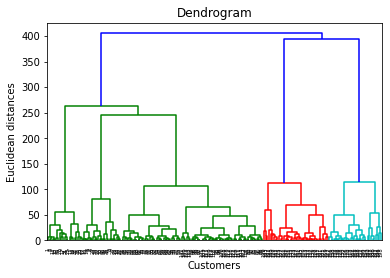

In [3]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch # Lib that contains tools for hc
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
# Ward -> Minimizing the variance between each cluster
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [4]:
# Training the Hierarchical Clustering model on the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

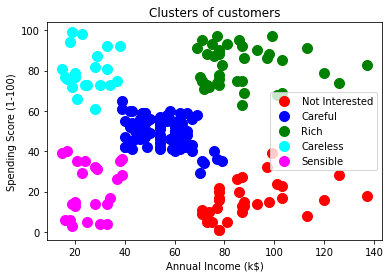

In [7]:
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Not Interested')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Careful')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Rich')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Sensible')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()